Use the imdb-reviews_2.csv file.

• Load the data

• Count the number of positive and negative sentiment

• Clean the text ‘review’ and create a column called ‘review_processed’

• Replace short words as
df['review_processed'] = df['review_processed'].apply(lambda x:
' '.join([w for w in x.split() if len(w)>2]))

• Make entire text lowercase

• Remove stopwords

• Make custom list of words to be removed including ‘movie’, ‘film’, ‘one’, ‘make’,
and ‘even’

• Add to the list of words

• Lemmatize the text

• Convert NLTK tags into ‘wordnet’ tags

• Find the part of speech tag

• Lemmatize sentences using POS. Tokenize the sentence and find POS tag for
each token

• Define ‘wordnet_tagged.’ If there is no available tag, append the token as is.
Else, use the tag to lemmatize the token

• Plot the most frequent words from positive reviews using bar chart. Subset
positive review dataset, extract words into list and count frequency. Subset top
30 words by frequency in a horizontal bar chart

• Create a word cloud

• Import CountVectorizer and create a sparse matrix of 2,500 tokens. Split the data set into train and test (20%) set

• Use the GaussianNB to train the model on the training data. Provide the
accuracy of the model

• Test the model on the test set

• Create the confusion matrix and classification report

• Use Seaborn heatmap to show TP, FP, TN, FN values

• Use a logistic regression model and check the accuracy of the model for C=0.01,0.05, 0.5, 0.5, and 1.

• Provide the ROC curve. What is the area under the curve?

In [116]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


In [117]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
df = pd.read_csv('imdb-reviews_2.csv')


In [119]:
sentiment_cat = df['label'].value_counts()
negative = sentiment_cat[0] if 0 in sentiment_cat else 0
positive = sentiment_cat[1] if 1 in sentiment_cat else 0

print("Number of Negative Sentiments:", negative)
print("Number of Positive Sentiments:", positive)


Number of Negative Sentiments: 2472
Number of Positive Sentiments: 2528


In [120]:
import re

def clean_text(text):
    text = re.sub(r'[^\w\s.]', '', text)
    text = re.sub(r',', '', text)
    return text
df['review_processed'] = df['review'].apply(clean_text)



In [121]:
df.head()

,review,label,review_processed
0,"first think another Disney movie, might good, it's kids movie. watch it, can't help enjoy it. ages love movie. first saw movie 10 8 years later still love it! Danny Glover superb could play part better. Christopher Lloyd hilarious perfect part. Tony Danza believable Mel Clark. can't help, enjoy movie! give 10/10!",1,first think another Disney movie might good its kids movie. watch it cant help enjoy it. ages love movie. first saw movie 10 8 years later still love it Danny Glover superb could play part better. Christopher Lloyd hilarious perfect part. Tony Danza believable Mel Clark. cant help enjoy movie give 1010
1,"Put aside Dr. House repeat missed, Desperate Housewives (new) watch one. don't know exactly plagued movie. never thought I'd say this, want 15 minutes fame back.<br /><br />Script, Direction, can't say. recognized stable actors (the usual suspects), thought Herbert Marshall class addition sat good cheesy flick. Boy, wrong. Dullsville.<br /><br />My favorite parts: ""office girl"" makes 029 keypunch puts cards 087 sorter. LOL @ ""the computer"". I'd like someone identify next device - 477 ? It's even dinosaur's time.<br /><br />And dinosaurs don't much time waste.",0,Put aside Dr. House repeat missed Desperate Housewives new watch one. dont know exactly plagued movie. never thought Id say this want 15 minutes fame back.br br Script Direction cant say. recognized stable actors the usual suspects thought Herbert Marshall class addition sat good cheesy flick. Boy wrong. Dullsville.br br My favorite parts office girl makes 029 keypunch puts cards 087 sorter. LOL the computer. Id like someone identify next device 477 Its even dinosaurs time.br br And dinosaurs dont much time waste.
2,"big fan Stephen King's work, film made even greater fan King. Pet Sematary Creed family. moved new house, seem happy. pet cemetery behind house. Creed's new neighbor Jud (played Fred Gwyne) explains burial ground behind pet cemetery. burial ground pure evil. Jud tells Louis Creed bury human (or kind pet) burial ground, would come back life. problem, come back, person, they're evil. Soon Jud explains everything Pet Sematary, everything starts go hell. wont explain anymore don't want give away main parts film. acting Pet Sematary pretty good, needed little bit work. story one main parts movie, mainly original gripping. film features lots make-up effects make movie way eerie, frightening. One basic reasons movie sent chills back, fact make-up effects. one character film truly freaky. character ""Zelda."" particular character pops film three times precise. Zelda Rachel Creed's sister passed away years before, Rachel still haunted her. first time Zelda appears movie isn't generally scary isn't talking anything, second time worst, honest, second time scares living **** me. absolutely nothing wrong movie, almost perfect. Pet Sematary delivers great scares, pretty good acting, first rate plot, mesmerizing make-up. truly one favorite horror films time. 10 10.",1,big fan Stephen Kings work film made even greater fan King. Pet Sematary Creed family. moved new house seem happy. pet cemetery behind house. Creeds new neighbor Jud played Fred Gwyne explains burial ground behind pet cemetery. burial ground pure evil. Jud tells Louis Creed bury human or kind pet burial ground would come back life. problem come back person theyre evil. Soon Jud explains everything Pet Sematary everything starts go hell. wont explain anymore dont want give away main parts film. acting Pet Sematary pretty good needed little bit work. story one main parts movie mainly original gripping. film features lots makeup effects make movie way eerie frightening. One basic reasons movie sent chills back fact makeup effects. one character film truly freaky. character Zelda. particular character pops film three times precise. Zelda Rachel Creeds sister passed away years before Rachel still haunted her. first time Zelda appears movie isnt generally scary i

In [122]:
df['review_processed'] = df['review_processed'].str.lower()

In [123]:
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


In [124]:
stop_words = set(stopwords.words('english'))
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [125]:
custom_remove = ['movie', 'film', 'one', 'make', 'even']

In [126]:
stop_words = set(stopwords.words('english')).union(custom_remove)

In [127]:

lemmatizer = WordNetLemmatizer()

# Function to lemmatize a sentence
def lemmatize_sentence(sentence):
    tokens = word_tokenize(sentence)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]
    return ' '.join(lemmatized_tokens)

df['review_processed'] = df['review_processed'].apply(lemmatize_sentence)

In [128]:
df.head()

,review,label,review_processed
0,"first think another Disney movie, might good, it's kids movie. watch it, can't help enjoy it. ages love movie. first saw movie 10 8 years later still love it! Danny Glover superb could play part better. Christopher Lloyd hilarious perfect part. Tony Danza believable Mel Clark. can't help, enjoy movie! give 10/10!",1,first think another disney might good kid . watch cant help enjoy . age love . first saw year later still love danny glover superb could play part better . christopher lloyd hilarious perfect part . tony danza believable mel clark . cant help enjoy give 1010
1,"Put aside Dr. House repeat missed, Desperate Housewives (new) watch one. don't know exactly plagued movie. never thought I'd say this, want 15 minutes fame back.<br /><br />Script, Direction, can't say. recognized stable actors (the usual suspects), thought Herbert Marshall class addition sat good cheesy flick. Boy, wrong. Dullsville.<br /><br />My favorite parts: ""office girl"" makes 029 keypunch puts cards 087 sorter. LOL @ ""the computer"". I'd like someone identify next device - 477 ? It's even dinosaur's time.<br /><br />And dinosaurs don't much time waste.",0,put aside dr. house repeat missed desperate housewife new watch . dont know exactly plagued . never thought say want minute fame back.br script direction cant say . recognized stable actor usual suspect thought herbert marshall class addition sat good cheesy flick . boy wrong . dullsville.br favorite part office girl make 029 keypunch put card 087 sorter . lol computer . like someone identify next device 477 dinosaur time.br dinosaur dont much time waste .
2,"big fan Stephen King's work, film made even greater fan King. Pet Sematary Creed family. moved new house, seem happy. pet cemetery behind house. Creed's new neighbor Jud (played Fred Gwyne) explains burial ground behind pet cemetery. burial ground pure evil. Jud tells Louis Creed bury human (or kind pet) burial ground, would come back life. problem, come back, person, they're evil. Soon Jud explains everything Pet Sematary, everything starts go hell. wont explain anymore don't want give away main parts film. acting Pet Sematary pretty good, needed little bit work. story one main parts movie, mainly original gripping. film features lots make-up effects make movie way eerie, frightening. One basic reasons movie sent chills back, fact make-up effects. one character film truly freaky. character ""Zelda."" particular character pops film three times precise. Zelda Rachel Creed's sister passed away years before, Rachel still haunted her. first time Zelda appears movie isn't generally scary isn't talking anything, second time worst, honest, second time scares living **** me. absolutely nothing wrong movie, almost perfect. Pet Sematary delivers great scares, pretty good acting, first rate plot, mesmerizing make-up. truly one favorite horror films time. 10 10.",1,big fan stephen king work made greater fan king . pet sematary creed family . moved new house seem happy . pet cemetery behind house . creed new neighbor jud played fred gwyne explains burial ground behind pet cemetery . burial ground pure evil . jud tell louis creed bury human kind pet burial ground would come back life . problem come back person theyre evil . soon jud explains everything pet sematary everything start hell . wont explain anymore dont want give away main part . acting pet sematary pretty good needed little bit work . story main part mainly original gripping . feature lot makeup effect way eerie frightening . basic reason sent chill back fact makeup effect . character truly freaky . character zelda . particular character pop three time precise . zelda rachel creed sister passed away year rachel still haunted . first time zelda appears isnt generally scary isnt talking anything second time worst honest second time scare living . absolutely nothing wrong almost perfect . pet sematary delivers great scare pretty good acting first rate plot mesmer

In [129]:

def nltk_to_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_with_pos(sentence):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = pos_tag(tokens)
    lemmatizer = WordNetLemmatizer()
    wordnet_tags = [(word, nltk_to_wordnet_pos(tag)) for word, tag in pos_tags]
    wordnet_tagged = [lemmatizer.lemmatize(word, pos=tag) if tag else word for word, tag in wordnet_tags]
    return wordnet_tagged

df['wordnet_tagged'] = df['review_processed'].apply(lemmatize_with_pos)

positive_reviews = ' '.join([' '.join(tokens) for tokens in df['wordnet_tagged']])



In [130]:
df.head()

,review,label,review_processed,wordnet_tagged
0,"first think another Disney movie, might good, it's kids movie. watch it, can't help enjoy it. ages love movie. first saw movie 10 8 years later still love it! Danny Glover superb could play part better. Christopher Lloyd hilarious perfect part. Tony Danza believable Mel Clark. can't help, enjoy movie! give 10/10!",1,first think another disney might good kid . watch cant help enjoy . age love . first saw year later still love danny glover superb could play part better . christopher lloyd hilarious perfect part . tony danza believable mel clark . cant help enjoy give 1010,"[first, think, another, disney, might, good, kid, ., watch, cant, help, enjoy, ., age, love, ., first, saw, year, later, still, love, danny, glover, superb, could, play, part, well, ., christopher, lloyd, hilarious, perfect, part, ., tony, danza, believable, mel, clark, ., cant, help, enjoy, give, 1010]"
1,"Put aside Dr. House repeat missed, Desperate Housewives (new) watch one. don't know exactly plagued movie. never thought I'd say this, want 15 minutes fame back.<br /><br />Script, Direction, can't say. recognized stable actors (the usual suspects), thought Herbert Marshall class addition sat good cheesy flick. Boy, wrong. Dullsville.<br /><br />My favorite parts: ""office girl"" makes 029 keypunch puts cards 087 sorter. LOL @ ""the computer"". I'd like someone identify next device - 477 ? It's even dinosaur's time.<br /><br />And dinosaurs don't much time waste.",0,put aside dr. house repeat missed desperate housewife new watch . dont know exactly plagued . never thought say want minute fame back.br script direction cant say . recognized stable actor usual suspect thought herbert marshall class addition sat good cheesy flick . boy wrong . dullsville.br favorite part office girl make 029 keypunch put card 087 sorter . lol computer . like someone identify next device 477 dinosaur time.br dinosaur dont much time waste .,"[put, aside, dr., house, repeat, miss, desperate, housewife, new, watch, ., dont, know, exactly, plague, ., never, think, say, want, minute, fame, back.br, script, direction, cant, say, ., recognize, stable, actor, usual, suspect, think, herbert, marshall, class, addition, sit, good, cheesy, flick, ., boy, wrong, ., dullsville.br, favorite, part, office, girl, make, 029, keypunch, put, card, 087, sorter, ., lol, computer, ., like, someone, identify, next, device, 477, dinosaur, time.br, dinosaur, dont, much, time, waste, .]"
2,"big fan Stephen King's work, film made even greater fan King. Pet Sematary Creed family. moved new house, seem happy. pet cemetery behind house. Creed's new neighbor Jud (played Fred Gwyne) explains burial ground behind pet cemetery. burial ground pure evil. Jud tells Louis Creed bury human (or kind pet) burial ground, would come back life. problem, come back, person, they're evil. Soon Jud explains everything Pet Sematary, everything starts go hell. wont explain anymore don't want give away main parts film. acting Pet Sematary pretty good, needed little bit work. story one main parts movie, mainly original gripping. film features lots make-up effects make movie way eerie, frightening. One basic reasons movie sent chills back, fact make-up effects. one character film truly freaky. character ""Zelda."" particular character pops film three times precise. Zelda Rachel Creed's sister passed away years before, Rachel still haunted her. first time Zelda appears movie isn't generally scary isn't talking anything, second time worst, honest, second time scares living **** me. absolutely nothing wrong movie, almost perfect. Pet Sematary delivers great scares, pretty good acting, first rate plot, mesmerizing make-up. truly one favorite horror films time. 10 10.",1,big fan stephen king work made greater fan king . pet sematary creed family . moved new house seem happy . pet cemetery behind house . creed new neighbor jud played fred gwyne explains burial ground behind pet cemetery . 

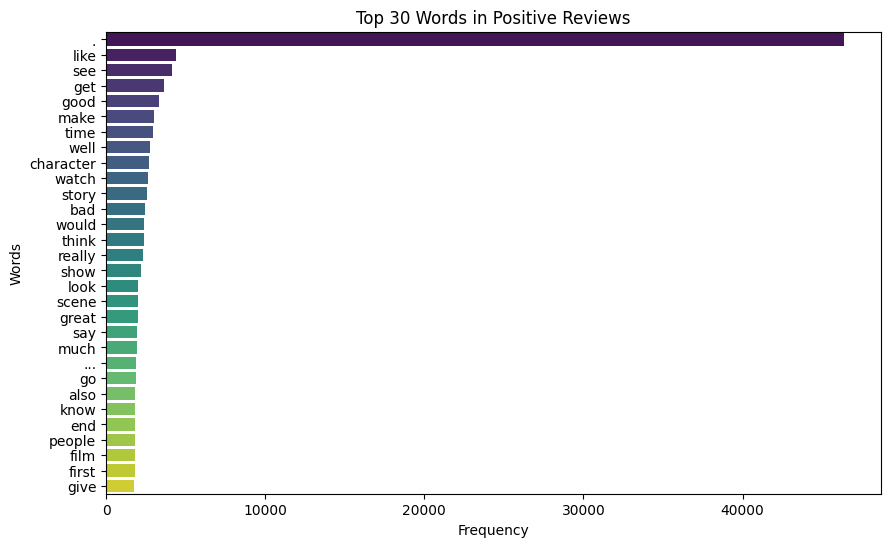

In [131]:
import seaborn as sns
def most_freq(positive_reviews):
    tokens = word_tokenize(positive_reviews)
    word_freq = Counter(tokens)
    top_words = word_freq.most_common(30)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[count for word, count in top_words], y=[word for word, count in top_words], palette="viridis")
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Top 30 Words in Positive Reviews')
    plt.show()

most_freq(positive_reviews)

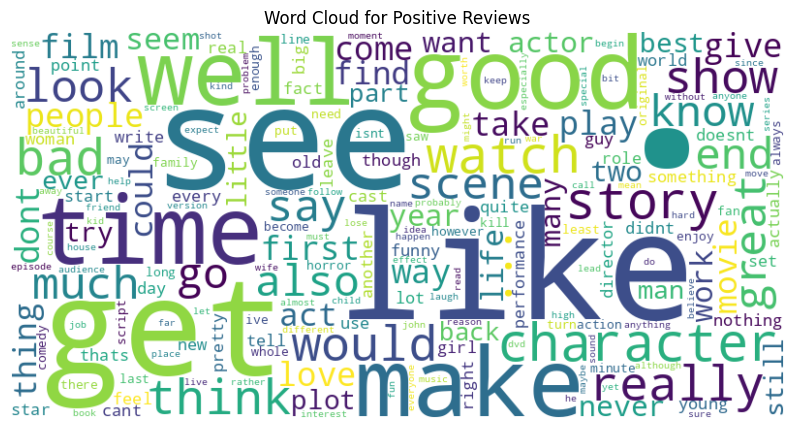

In [132]:
def wordcloud(positive_reviews):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(word_tokenize(positive_reviews)))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Reviews')
    plt.show()

wordcloud(positive_reviews)

In [142]:

vectorizer = CountVectorizer(max_features=2500)
X_train, X_test, y_train, y_test = train_test_split(df['review_processed'], df['label'], test_size=0.2, random_state=42)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

gaussian_NB = GaussianNB()
gaussian_NB.fit(X_train_vectorized.toarray(), y_train)

train_acc= accuracy_score(y_train, gaussian_NB.predict(X_train_vectorized.toarray()))
print(f"Training Accuracy: {train_acc}")
test_acc = accuracy_score(y_test, gaussian_NB.predict(X_test_vectorized.toarray()))
print(f"Testing Accuracy: {test_acc}")


Training Accuracy: 0.80075
Testing Accuracy: 0.727


In [151]:
report = classification_report(y_test, gaussian_NB.predict(X_test_vectorized.toarray()))
print("Classification Report :")
print(report)

Classification Report :
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       479
           1       0.82      0.61      0.70       521

    accuracy                           0.73      1000
   macro avg       0.74      0.73      0.72      1000
weighted avg       0.75      0.73      0.72      1000



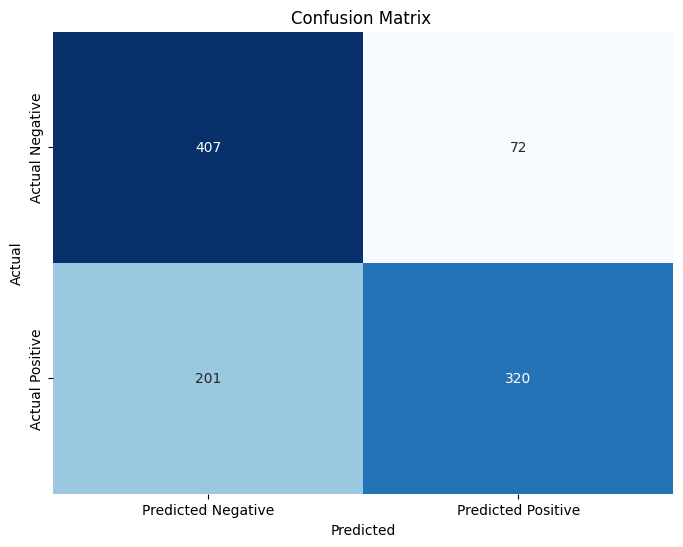

In [152]:


matrix = confusion_matrix(y_test, gaussian_NB.predict(X_test_vectorized.toarray()))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
plt.show()


Testing Accuracy  for C=0.01: 0.848
Testing Accuracy  for C=0.05: 0.853
Testing Accuracy  for C=0.5: 0.847
Testing Accuracy  for C=0.75: 0.838
Testing Accuracy  for C=1: 0.837


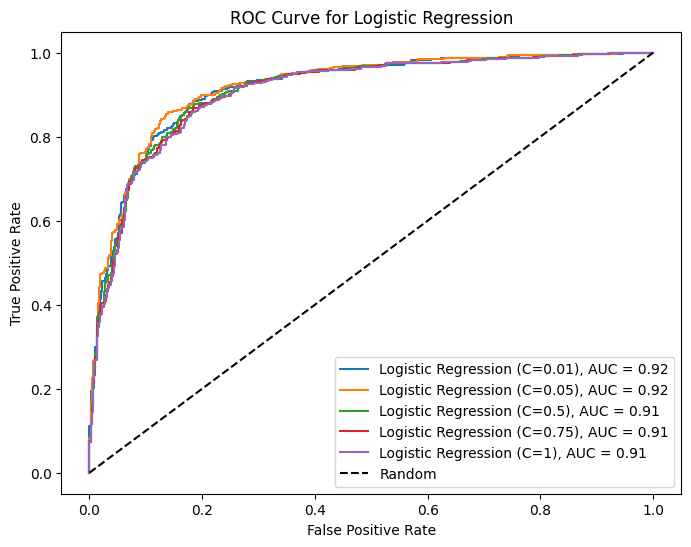

Area under the curve can be given by average AUC score from the results, that is 0.91


In [160]:
results = []

# Logistic Regression model with different values of C
for c in [0.01, 0.05, 0.5, 0.75, 1]:
    logreg = LogisticRegression(C=c, max_iter=1000, random_state=42)
    logreg.fit(X_train_vectorized, y_train)
    accuracy = accuracy_score(y_test, logreg.predict(X_test_vectorized))
    print(f"Testing Accuracy  for C={c}: {accuracy}")


    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_vectorized)[:, 1])
    auc_score = auc(fpr, tpr)
    results.append((fpr, tpr, auc_score))

plt.figure(figsize=(8, 6))
for i, (fpr, tpr, auc_score) in enumerate(results):
    plt.plot(fpr, tpr, label=f'Logistic Regression (C={0.01 * (i + 1):.2f}), AUC = {auc_score:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')

plt.legend([f'Logistic Regression (C={c}), AUC = {auc_score:.2f}' for c, (_, _, auc_score) in zip([0.01, 0.05, 0.5, 0.75, 1], results)] + ['Random'])

plt.show()



combined_auc = sum(auc_score for _, _, auc_score in results) / len(results)
print(f"Area under the curve can be given by average AUC score from the results, that is {combined_auc:.2f}")